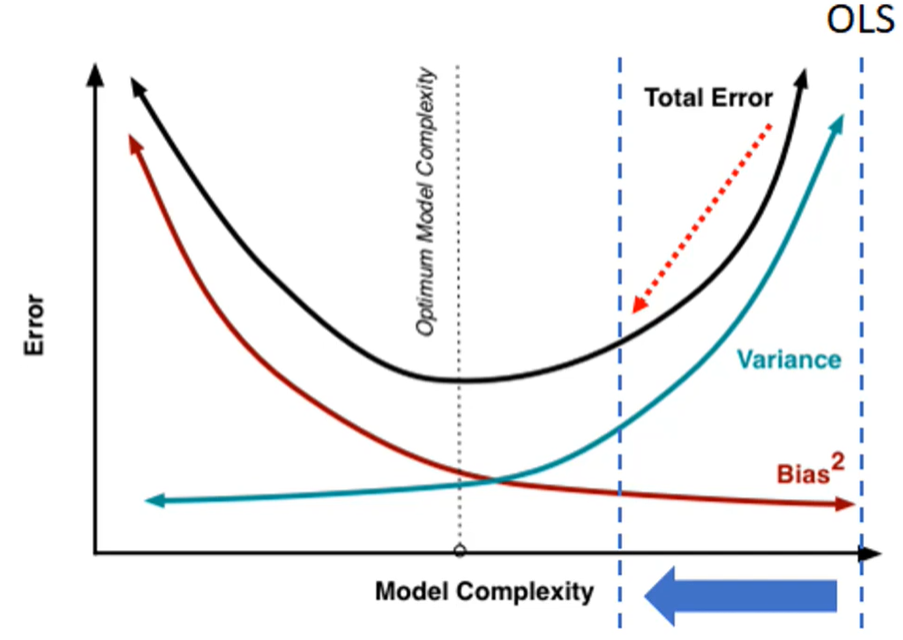

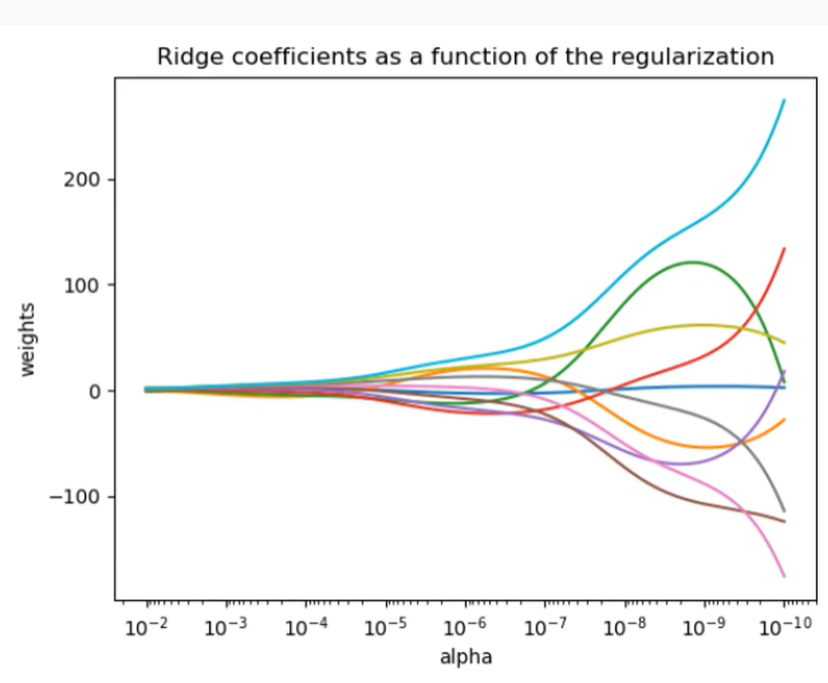

In [ ]:
#Boston datasetini Yükleyelim 
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
#Veri setinin özet bilgilerine bakalım 
print (boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Anında ihtiyaç duyduğunuz bir kütüphaneyi aşağıdaki gibi yükleyebilirsiniz. 
!pip install mglearn


     |████████████████████████████████| 542kB 8.0MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=97c130b63556d943846c2ad4263ec079c8280bb72ed3a1f72deb9e32b953e0a8
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
#Temel Makine Öğrenmesi eğitim setlerini içeren MGLEARN Kütüphanesini ekleyelim 
import mglearn

In [ ]:
#Bu işlemleri Scikitlearn ile de yapabilirsiniz 
#X = boston.data
#Y = boston.target 
#kodları ile yapmak mümkündür. 
#Temel makine öğrenmesinin daha iyi anlaşılması için oluşturulan "MGLEARN" kütüphanesi size yardımcı olmak için kullanılmaktadır. 
x,y = mglearn.datasets.load_extended_boston()

In [ ]:
#Öznitelik Matris Yapısını Görelim
x.shape

(506, 104)

In [ ]:
#Ridge Regresyon Modeli İçin 

#Önce Girdi ve Çıktıyı- Eğitim ve Test olarak Parçalayalım 

from sklearn.model_selection import train_test_split

In [ ]:
x_egitim, x_test, y_egitim, y_test = train_test_split(x,y, random_state=0)

In [ ]:
#Ridge Fonk. İmport Edelim 
from sklearn.linear_model import Ridge

#Şimdi modeli fit leyelim 
ridge = Ridge() .fit(x_egitim, y_egitim)

In [ ]:
#eğitim ve Test Verileri için kurulan modelin Performans Skorlarını İnceleyelim 
print (ridge.score(x_egitim, y_egitim))
print (ridge.score(x_test, y_test))

0.8857966585170941
0.7527683481744751


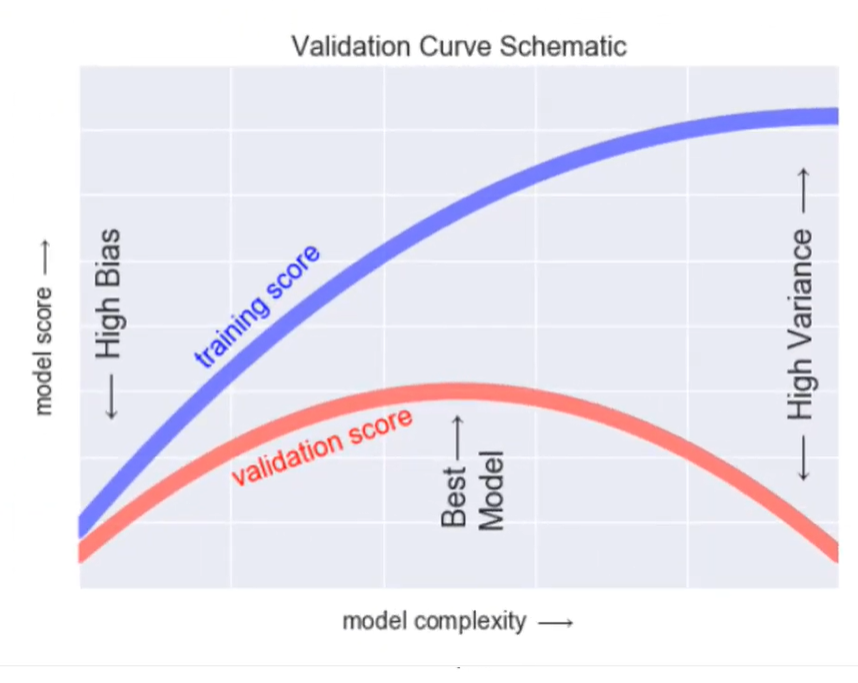

In [ ]:
#Alpha Değerini 10 yapalım
ridge10= Ridge(alpha= 10).fit(x_egitim, y_egitim)
print(ridge10.score(x_egitim,y_egitim))
print(ridge10.score(x_test,y_test))

0.7882787115369614
0.6359411489177309


In [ ]:
#Alpha Değerini 0,1 yapalım
ridge01= Ridge(alpha= 0.1).fit(x_egitim, y_egitim)
print(ridge01.score(x_egitim,y_egitim))
print(ridge01.score(x_test,y_test))

0.9282273685001992
0.7722067936479818


#LASSO' YA BAKALIM 

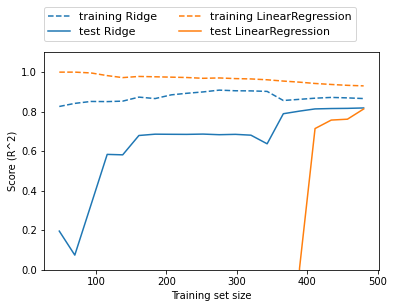

In [ ]:
#LASSO İÇİN MGLEARN KULLANARAK N ÖRNEK İÇİN BİR EĞRİ ÇİZELİM 
mglearn.plots.plot_ridge_n_samples()

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_egitim, y_egitim)

In [ ]:
print (lasso.score(x_egitim, y_egitim))

0.29323768991114607


In [ ]:
print (lasso.score(x_test, y_test))

0.20937503255272294


#Yukarıdaki Sonuçlar Modelde Unfitting olduğunu gösterir 

In [ ]:
#Sıfıra eşit olmayan katsayılar Toplamına Bakalım.. 
import numpy as np 
np.sum(lasso.coef_!=0)

4

#105 Nitelikten 4 Tanesi Kullanılmış! 

In [ ]:
#Şimdi bu durumu biraz değiştirip alpha ile oynayalım 
lasso001 = Lasso(alpha = 0.001, max_iter=100000).fit(x_egitim, y_egitim)
print (lasso001.score(x_egitim, y_egitim))
print (lasso001.score(x_test, y_test))


0.939282766590254
0.7386563657403378


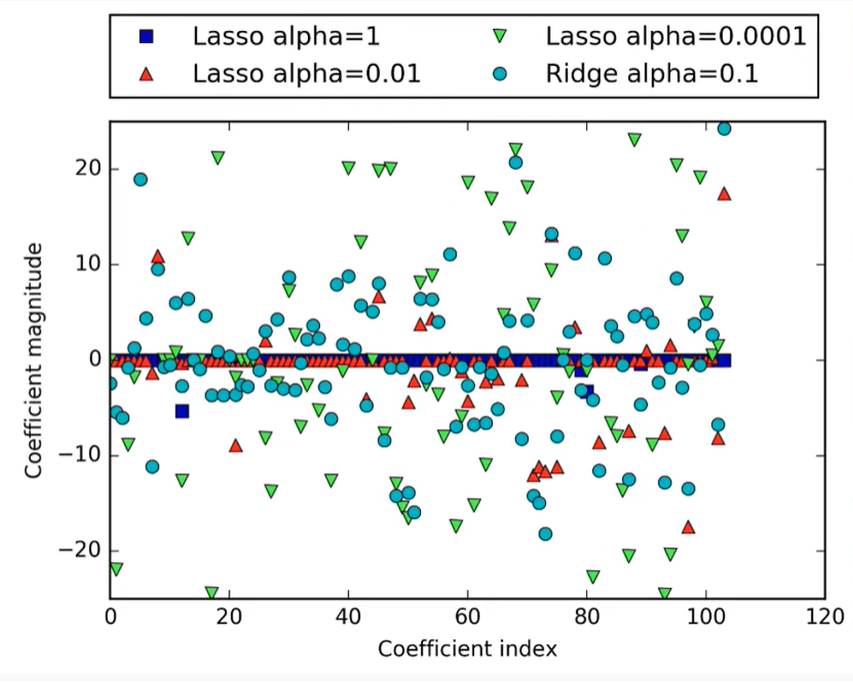

In [ ]:
#ELASTIC.NET 
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error

enet = ElasticNet().fit(x_egitim, y_egitim)
print(np.sqrt(mean_squared_error(y_test, enet.predict(x_test))))
enet_cv = ElasticNetCV(cv = 10, random_state=1).fit(x_egitim, y_egitim)
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(x_egitim, y_egitim)
print(np.sqrt(mean_squared_error(y_test, enet_tuned.predict(x_test))))

7.97410233387675


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.127313375754966, tolerance: 3.0754797947214074
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.42628007141866, tolerance: 3.0754797947214074
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.157411485848115, tolerance: 3.0754797947214074
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incr

4.414911867401969


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.029497551771783, tolerance: 3.0209210058479536
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852.5225873776212, tolerance: 3.233182126649076
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852.5225873776212, tolerance: 3.233182126649076
  positive)


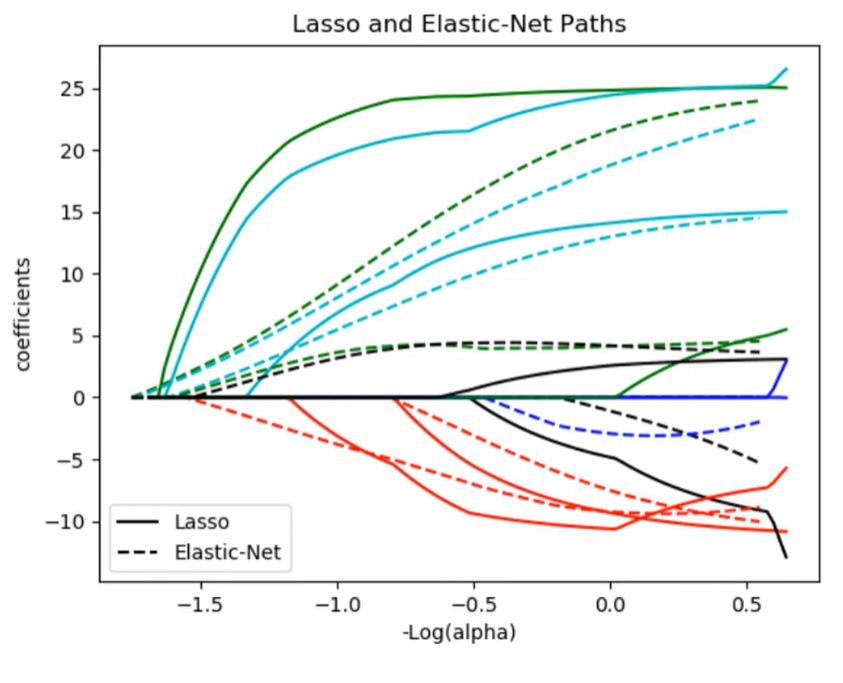

